<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at 'In [13]'.</span>

# Results template

In this notebook we get the results of simulations performed with the nearest neighbours (ssh1) and second neighbours (ssh2) systems.

In [1]:
%load_ext autoreload
%autoreload 2
from simulation_results import *
#import template_parameters

# Defining parameters

In [2]:
%%time

#########################################################################
###################### Simulation and experiment ########################
#########################################################################

#figs_dir = "/home/linneu/paper/ml_topological_phases_in_real_space/paper/ssh1/periodic_100_6561"
simulation_dir = SSH1_PERIODIC_100_6561_SIMULATION_DIR  #"/home/linneu/ssh_simulations/ssh1/periodic_100_6561"
experiment_name = "0"
n_experiments = None
load_hamiltonian_summary = False
#winding_cmap_dict = {0: "Reds", 1:"Blues"}

#########################################################################
################### Results from a single experiment ####################
#########################################################################

### Visualizing train/val/test splits with scatter plot for a single experiment
scatter_train_val_test_params = {
"fig_params":{"figsize": (6,6)}, 
"val_params": {"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"},
"test_params": {"marker": "s", "s": 64, "alpha": 0.5, "color": "royalblue", "label": "test"},
"train_params": {"marker": "o", "s": 3, "alpha": 1, "color": "green", "label": "train"},
"legend_params": {"framealpha": 0.8, "loc": "upper right", "fontsize": 16},
"xlabel_params": {"xlabel": "$t_2$", "fontsize": 24},
"ylabel_params": {"ylabel": "$t_1$", "fontsize": 24},
"title_params": {},
"xlim_params": {"left": -2, "right": 2},
"ylim_params": {"bottom": -2, "top": 2},
"xticks_params": {"fontsize": 14},
"yticks_params": {"fontsize": 14},
"tight_params": {},
"savefig_params": {"fname": os.path.join(SSH1_PERIODIC_100_6561_FIGURES_DIR,"scatter_train_val_test_experiment_0.png")},
}

### Plotting train winding labels with scatter plot for a single experiment
scatter_winding_train_params = {
"fig_params":{"figsize": (6,6)}, 
"winding_params": {0: {"marker": "o", "s": 10, "color": "red", "label": 0}, \
                   1: {"marker": "o", "s": 10, "color": "blue", "label": 1}, \
                                    },
"legend_params": {"framealpha": 0.8, "loc": "upper right", "fontsize": 16},
"xlabel_params": {"xlabel": "$t_2$", "fontsize": 24},
"ylabel_params": {"ylabel": "$t_1$", "fontsize": 24},
"title_params": {},
"xlim_params": {"left": -2, "right": 2},
"ylim_params": {"bottom": -2, "top": 2},
"xticks_params": {"fontsize": 14},
"yticks_params": {"fontsize": 14},
"tight_params": {},
#"train_winding_path_to_save": "/home/linneu/ml_topological_phases_in_real_space/paper/ssh1/periodic_100_6561/train_winding_labels_experiment_0.png",
"savefig_params": {"fname": os.path.join(SSH1_PERIODIC_100_6561_FIGURES_DIR,"scatter_winding_train_experiment_0.png")},
}
        
### Plotting prediction grid with pcolormesh
pcolormesh_prediction_grid_params = {
"fig_params": {"figsize": (6,6)},
"winding_params": {0: {"marker": "o", "s": 10, "color": "red", "label": 0}, 
                   1: {"marker": "o", "s": 10, "color": "blue", "label": 1}},
#"prediction_grid_pcolormesh_params": {"cmap": ListedColormap(["hotpink", "lightskyblue"]), "alpha": 0.5},
"pcolormesh_params": {"cmap": "ssh1", "alpha": 0.5},
"legend_params": {"framealpha": 0.8, "loc": "upper right", "fontsize": 16},
"xlabel_params": {"xlabel": "$t_2$", "fontsize": 24},
"ylabel_params": {"ylabel": "$t_1$", "fontsize": 24},
"title_params": {},
"xlim_params": {"left": -2, "right": 2},
"ylim_params": {"bottom": -2, "top": 2},
"xticks_params": {"fontsize": 14},
"yticks_params": {"fontsize": 14},
"tight_params": {},
"savefig_params": {"fname": os.path.join(SSH1_PERIODIC_100_6561_FIGURES_DIR,"pcolormesh_prediction_grid_experiment_0.png")},
}
    
### Plotting Winding Heatmaps for a single experiment
winding_cmap_dict = {0: "Reds", 1:"Blues"}
imshow_winding_grid_params = {
"winding": 1,
"imshow_params": {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2],\
                  "vmin": 0, "vmax":1},
"colorbar_params": {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
                                           "extend": "neither"},
#"colorbar_params": {0:{"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
#                                           "extend": "neither"},
#                    1: {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
#                                           "extend": "neither"}},
"fig_params": {"figsize": (12,12)},
"xlabel_params": {"xlabel": "$t_2$", "fontsize": 48},
"ylabel_params": {"ylabel": "$t_1$", "fontsize": 48},
"title_params": {},
"xlim_params": {"left": -2, "right": 2},
"ylim_params": {"bottom": -2, "top": 2},
"xticks_params": {"fontsize": 24},
"yticks_params": {"fontsize": 24},
"tight_params": {},
"savefig_params": {"fname": os.path.join(SSH1_PERIODIC_100_6561_FIGURES_DIR,"imshow_winding_grid_winding_{}_{}.png")},
} 
        
##################################################################################
################### Bootstrapped results from all experiments ####################
##################################################################################
    
### Plotting simulation winding heatmaps
merge_imshow_winding_grids_params = {
"winding_params": {1: {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1}},
#"winding_params": {0: {"cmap": "Reds_alpha", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
#                                           "vmin": 0, "vmax": 1},
#                       1: {"cmap": "Blues_alpha", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
#                                           "vmin": 0, "vmax": 1}},
"colorbar_params": {1: {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
                                           "extend": "neither"}},
"fig_params": {"figsize": (12,12)},
"xlabel_params": {"xlabel": "$t_2$", "fontsize": 48},
"ylabel_params": {"ylabel": "$t_1$", "fontsize": 48},
"title_params": {},
"xlim_params": {"left": -2, "right": 2},
"ylim_params": {"bottom": -2, "top": 2},
"xticks_params": {"fontsize": 24},
"yticks_params": {"fontsize": 24},
"tight_params": {},
#"sim_winding_heatmap_path_to_save": "/home/linneu/ml_topological_phases_in_real_space/paper/ssh1/{}_{}_{}/simulation_merged_winding_grid.png".format(ssh_type,chain_length,n_hamiltonians),
"savefig_params": {"fname": os.path.join(SSH1_PERIODIC_100_6561_FIGURES_DIR,"merge_winding_grids_{}.png")},
}
        
### Plotting feature importances
plot_feature_importances_params = {
"n_features": None,
"plot": "bar",
"plot_params": {"color": "indianred", "width": 0.7},
"hist_precision": 1000,
"fig_params": {"figsize": (12,12)}, 
"xlabel_params": {"xlabel": "lattice site", "fontsize": 24},
"ylabel_params": {"ylabel": "reduction in information entropy (%)", "fontsize": 24},
"title_params": {"label": "Information entropy signature - SSH 1", "fontsize": 24},
"xlim_params": {},
"ylim_params": {},
"xticks_params": {"ticks": [int(i) for i in np.linspace(0,99,10).astype(int)], "fontsize": 24},
"yticks_params": {"fontsize": 24},
"tight_params": {},
#"feature_importances_path_to_save": "/home/linneu/ml_topological_phases_in_real_space/paper/ssh1/{}_{}_{}/feature_importances.png".format(ssh_type,chain_length,n_hamiltonians),
"savefig_params": {"fname": os.path.join(SSH1_PERIODIC_100_6561_FIGURES_DIR,"plot_feature_importances.png")},
}

### Plotting cumulative feature importances
plot_cumulative_feature_importances_params = {
"n_features": None,
"plot": "bar",
"hist_precision": 1000,
"plot_params": {"color":"indianred", "width": 0.7},
"fig_params": {"figsize": (12,12)},
"xlabel_params": {"xlabel": "lattice site", "fontsize": 24},
"ylabel_params": {"ylabel": "cumulative reduction in information entropy (%)", "fontsize": 24},
"title_params": {"label": "Cumulative information entropy signature - SSH 1", "fontsize": 24},
"xlim_params": {},
"ylim_params": {},
"xticks_params": {"ticks": [int(i) for i in np.linspace(0,99,10).astype(int)], "fontsize": 24},
"yticks_params": {"fontsize": 24},
"tight_params": {},
#cumulative_features_path_to_save = "/home/linneu/ml_topological_phases_in_real_space/paper/ssh1/periodic_100_6561/cumulative_feature_importances.png"
"savefig_params": {"fname": os.path.join(SSH1_PERIODIC_100_6561_FIGURES_DIR,"plot_cumulative_feature_importances.png")},
}

CPU times: user 282 µs, sys: 0 ns, total: 282 µs
Wall time: 150 µs


In [3]:
# Parameters
scatter_train_val_test_params = {
    "fig_params": {"figsize": [6, 6]},
    "val_params": {
        "marker": "s",
        "s": 64,
        "alpha": 0.2,
        "color": "salmon",
        "label": "val",
    },
    "test_params": {
        "marker": "s",
        "s": 64,
        "alpha": 0.5,
        "color": "royalblue",
        "label": "test",
    },
    "train_params": {
        "marker": "o",
        "s": 3,
        "alpha": 1,
        "color": "green",
        "label": "train",
    },
    "legend_params": {"framealpha": 0.8, "loc": "upper right", "fontsize": 16},
    "xlabel_params": {"xlabel": "$t_2$", "fontsize": 24},
    "ylabel_params": {"ylabel": "$t_1$", "fontsize": 24},
    "title_params": {},
    "xlim_params": {"left": -2, "right": 2},
    "ylim_params": {"bottom": -2, "top": 2},
    "xticks_params": {"fontsize": 14},
    "yticks_params": {"fontsize": 14},
    "tight_params": {},
    "savefig_params": {
        "fname": "/home/rio/ml_topological_phases_in_real_space/paper/ssh2/periodic_100_6561/scatter_train_val_test_experiment_0.png"
    },
}
scatter_winding_train_params = {
    "fig_params": {"figsize": [6, 6]},
    "winding_params": {
        "-1": {"marker": "o", "s": 10, "color": "red", "label": -1},
        "0": {"marker": "o", "s": 10, "color": "darkorange", "label": 0},
        "1": {"marker": "o", "s": 10, "color": "green", "label": 1},
        "2": {"marker": "o", "s": 10, "color": "blue", "label": 2},
    },
    "legend_params": {"framealpha": 0.8, "loc": "upper right", "fontsize": 16},
    "xlabel_params": {"xlabel": "$t_2$", "fontsize": 24},
    "ylabel_params": {"ylabel": "$t_1$", "fontsize": 24},
    "title_params": {},
    "xlim_params": {"left": -2, "right": 2},
    "ylim_params": {"bottom": -2, "top": 2},
    "xticks_params": {"fontsize": 14},
    "yticks_params": {"fontsize": 14},
    "tight_params": {},
    "savefig_params": {
        "fname": "/home/rio/ml_topological_phases_in_real_space/paper/ssh2/periodic_100_6561/scatter_winding_train_experiment_0.png"
    },
}
pcolormesh_prediction_grid_params = {
    "fig_params": {"figsize": [6, 6]},
    "winding_params": {
        "-1": {"marker": "o", "s": 10, "color": "red", "label": -1},
        "0": {"marker": "o", "s": 10, "color": "darkorange", "label": 0},
        "1": {"marker": "o", "s": 10, "color": "green", "label": 1},
        "2": {"marker": "o", "s": 10, "color": "blue", "label": 2},
    },
    "pcolormesh_params": {"cmap": "ssh2", "alpha": 0.5},
    "legend_params": {"framealpha": 0.8, "loc": "upper right", "fontsize": 16},
    "xlabel_params": {"xlabel": "$t_2$", "fontsize": 24},
    "ylabel_params": {"ylabel": "$t_1$", "fontsize": 24},
    "title_params": {},
    "xlim_params": {"left": -2, "right": 2},
    "ylim_params": {"bottom": -2, "top": 2},
    "xticks_params": {"fontsize": 14},
    "yticks_params": {"fontsize": 14},
    "tight_params": {},
    "savefig_params": {
        "fname": "/home/rio/ml_topological_phases_in_real_space/paper/ssh2/periodic_100_6561/pcolormesh_prediction_grid_experiment_0.png"
    },
}
winding_cmap_dict = {"-1": "Reds", "0": "Oranges", "1": "Greens", "2": "Blues"}
imshow_winding_grid_params = {
    "winding": -1,
    "imshow_params": {
        "cmap": "Reds",
        "aspect": "equal",
        "alpha": None,
        "origin": "lower",
        "extent": [-2, 2, -2, 2],
        "vmin": 0,
        "vmax": 1,
    },
    "colorbar_params": {
        "mappable": None,
        "labelsize": 24,
        "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0],
        "pad": 0.1,
        "shrink": 0.8,
        "extend": "neither",
    },
    "fig_params": {"figsize": [12, 12]},
    "xlabel_params": {"xlabel": "$t_2$", "fontsize": 48},
    "ylabel_params": {"ylabel": "$t_1$", "fontsize": 48},
    "title_params": {},
    "xlim_params": {"left": -2, "right": 2},
    "ylim_params": {"bottom": -2, "top": 2},
    "xticks_params": {"fontsize": 24},
    "yticks_params": {"fontsize": 24},
    "tight_params": {},
    "savefig_params": {
        "fname": "/home/rio/ml_topological_phases_in_real_space/paper/ssh2/periodic_100_6561/imshow_winding_grid_winding_{}_{}.png"
    },
}
merge_imshow_winding_grids_params = {
    "winding_params": {
        "-1": {
            "cmap": "Reds_alpha",
            "aspect": "equal",
            "alpha": 1,
            "origin": "lower",
            "extent": [-2, 2, -2, 2],
            "vmin": 0,
            "vmax": 1,
        },
        "0": {
            "cmap": "Oranges_alpha",
            "aspect": "equal",
            "alpha": 1,
            "origin": "lower",
            "extent": [-2, 2, -2, 2],
            "vmin": 0,
            "vmax": 1,
        },
        "1": {
            "cmap": "Greens_alpha",
            "aspect": "equal",
            "alpha": 1,
            "origin": "lower",
            "extent": [-2, 2, -2, 2],
            "vmin": 0,
            "vmax": 1,
        },
        "2": {
            "cmap": "Blues_alpha",
            "aspect": "equal",
            "alpha": 1,
            "origin": "lower",
            "extent": [-2, 2, -2, 2],
            "vmin": 0,
            "vmax": 1,
        },
    },
    "colorbar_params": {},
    "fig_params": {"figsize": [12, 12]},
    "xlabel_params": {"xlabel": "$t_2$", "fontsize": 48},
    "ylabel_params": {"ylabel": "$t_1$", "fontsize": 48},
    "title_params": {},
    "xlim_params": {"left": -2, "right": 2},
    "ylim_params": {"bottom": -2, "top": 2},
    "xticks_params": {"fontsize": 24},
    "yticks_params": {"fontsize": 24},
    "tight_params": {},
    "savefig_params": {
        "fname": "/home/rio/ml_topological_phases_in_real_space/paper/ssh2/periodic_100_6561/merge_imshow_winding_grids_{}.png"
    },
}
plot_feature_importances_params = {
    "n_features": None,
    "plot": "bar",
    "plot_params": {"color": "indianred", "width": 0.7},
    "hist_precision": 1000,
    "fig_params": {"figsize": [12, 12]},
    "xlabel_params": {"xlabel": "lattice site", "fontsize": 24},
    "ylabel_params": {"ylabel": "reduction in information entropy (%)", "fontsize": 24},
    "title_params": {"label": "Information entropy signature - SSH 1", "fontsize": 24},
    "xlim_params": {},
    "ylim_params": {},
    "xticks_params": {"ticks": [0, 11, 22, 33, 44, 55, 66, 77, 88, 99], "fontsize": 24},
    "yticks_params": {"fontsize": 24},
    "tight_params": {},
    "savefig_params": {
        "fname": "/home/rio/ml_topological_phases_in_real_space/paper/ssh2/periodic_100_6561/plot_feature_importances.png"
    },
}
plot_cumulative_feature_importances_params = {
    "n_features": None,
    "plot": "bar",
    "hist_precision": 1000,
    "plot_params": {"color": "indianred", "width": 0.7},
    "fig_params": {"figsize": [12, 12]},
    "xlabel_params": {"xlabel": "lattice site", "fontsize": 24},
    "ylabel_params": {
        "ylabel": "cumulative reduction in information entropy (%)",
        "fontsize": 24,
    },
    "title_params": {
        "label": "Cumulative information entropy signature - SSH 1",
        "fontsize": 24,
    },
    "xlim_params": {},
    "ylim_params": {},
    "xticks_params": {"ticks": [0, 11, 22, 33, 44, 55, 66, 77, 88, 99], "fontsize": 24},
    "yticks_params": {"fontsize": 24},
    "tight_params": {},
    "savefig_params": {
        "fname": "/home/rio/ml_topological_phases_in_real_space/paper/ssh2/periodic_100_6561/plot_cumulative_feature_importances.png"
    },
}
simulation_dir = "/home/rio/ssh_simulations/ssh2/periodic_100_6561"
experiment_name = "0"
n_experiments = None
load_hamiltonian_summary = False


## Results from a single experiment

#### Initializing Experiment instance

In [4]:
experiment = Experiment(simulation_dir, experiment_name)

#### Viewing Train/Val/Test split

In [5]:
experiment.print_train_val_test()

% train:  0.27251943301326015
% val:  0.27251943301326015
% test:  0.45496113397347965
% train + val + test:  1.0


number of train hamiltonians:  1788
number of val hamiltonians:  1788
number of test hamiltonians:  2985
total number of hamiltonians:  6561


#### Viewing dataset summary

In [6]:
experiment.print_phases()

Summary of train + val data

% train/val phases: 
0    0.501957
1    0.498043
Name: phase, dtype: float64


total train/val phases: 
0    1795
1    1781
Name: phase, dtype: int64


Summary of test data

% test phases: 
1    0.534314
0    0.465686
Name: phase, dtype: float64


total test phases: 
1    109
0     95
Name: phase, dtype: int64


Summary of train + val + test data

% phases: 
1    0.5
0    0.5
Name: phase, dtype: float64


total phases: 
1    1890
0    1890
Name: phase, dtype: int64


#### Viewing eigenvector summary

In [7]:
experiment.eigenvector_summary.head()

,id,phase,pred_phase,type_of
0,0,999,0,test
1,0,999,0,test
2,0,999,1,test
3,0,999,1,test
4,0,999,1,test


#### Vieweng Hamiltonian summary

In [8]:
experiment.hamiltonian_summary.head()

,t1,t2,type_of,0,1,phase,pred_phase
id,,,,,,,
0,-2.0,-2.00,test,0.61,0.39,999,-1
1,-2.0,-1.95,test,0.56,0.44,999,-1
2,-2.0,-1.90,test,0.68,0.32,999,-1
3,-2.0,-1.85,test,0.54,0.46,999,-1
4,-2.0,-1.80,test,0.64,0.36,999,-1


#### Viewing accuracy

In [9]:
experiment.accuracy

{'eigenvector_train': 0.9997203579418344,
 'eigenvector_val': 0.991851230425056,
 'eigenvector_test': 0.8180882352941177,
 'hamiltonian_train': 0.0,
 'hamiltonian_val': 0.0,
 'hamiltonian_test': 0.00980392156862745}

#### Visualizing train/val/test splits with scatter plot for a single experiment

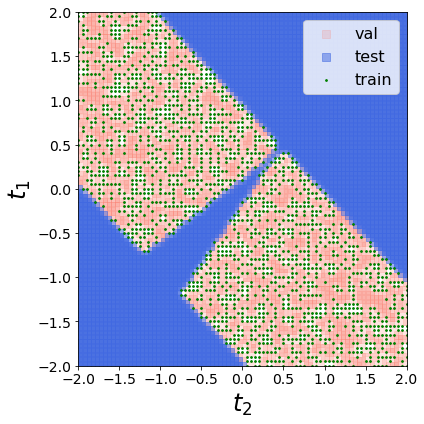

In [10]:
experiment.scatter_train_val_test(**scatter_train_val_test_params)


#### Plotting train winding labels with scatter plot for a single experiment

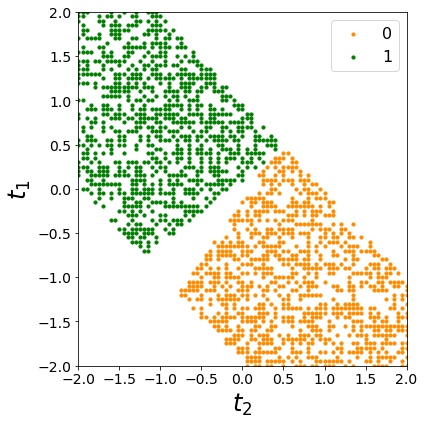

In [11]:
scatter_winding_train_params["winding_params"] = {int(w): scatter_winding_train_params["winding_params"][w] for w in 
                                                  scatter_winding_train_params["winding_params"]}
experiment.scatter_winding_train(**scatter_winding_train_params)


#### Plotting prediction grid with pcolormesh for a single experiment

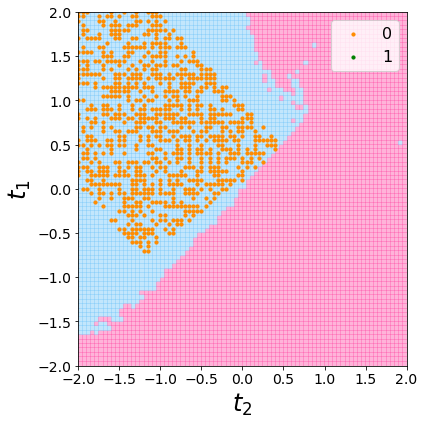

In [12]:
pcolormesh_prediction_grid_params["winding_params"] = {int(w): pcolormesh_prediction_grid_params["winding_params"][w] for w in 
                                                  pcolormesh_prediction_grid_params["winding_params"]}
experiment.pcolormesh_prediction_grid(**pcolormesh_prediction_grid_params)


#### Plotting single Winding Heatmaps for a single experiment

KeyError: -1

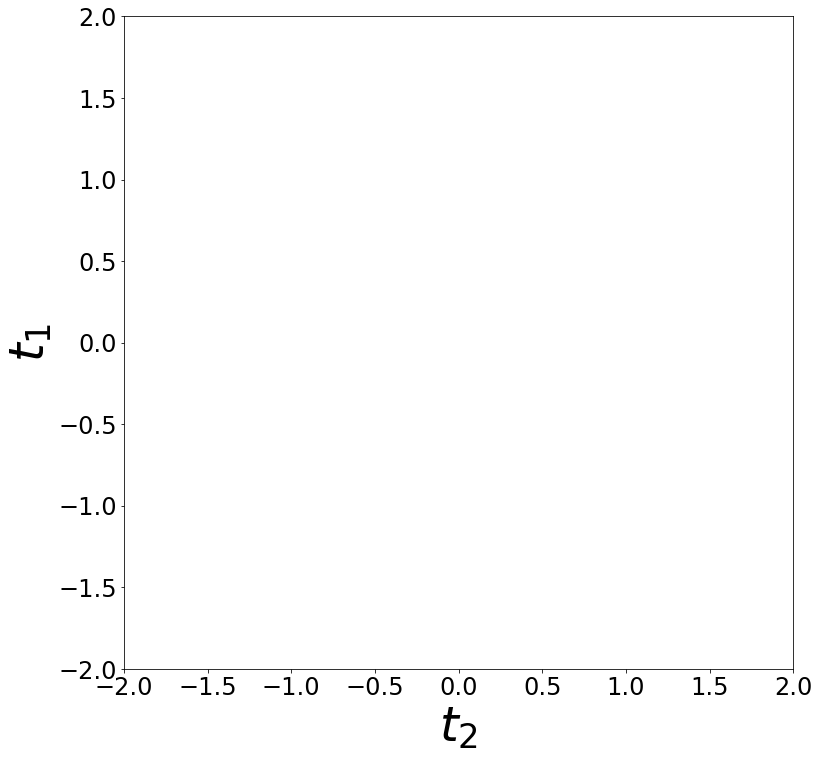

In [13]:
winding_cmap_dict = {int(w): winding_cmap_dict[w] for w in                                                   winding_cmap_dict}
fname = imshow_winding_grid_params["savefig_params"]["fname"]
for w, c in winding_cmap_dict.items():
    imshow_winding_grid_params["winding"] = w
    imshow_winding_grid_params["imshow_params"]["cmap"] = c
    imshow_winding_grid_params["savefig_params"]["fname"] = fname.format(w,"exp_"+experiment_name)
    experiment.imshow_winding_grid(**imshow_winding_grid_params)
imshow_winding_grid_params["savefig_params"]["fname"] = fname

#### Plotting Merged Winding Heatmaps for a single experiment

In [ ]:
merge_imshow_winding_grids_params["winding_params"] = {int(w): merge_imshow_winding_grids_params["winding_params"][w] for w in 
                                                  merge_imshow_winding_grids_params["winding_params"]}
merge_imshow_winding_grids_params["colorbar_params"] = {int(w): merge_imshow_winding_grids_params["colorbar_params"][w] for w in 
                                                  merge_imshow_winding_grids_params["colorbar_params"]}
fname = merge_imshow_winding_grids_params["savefig_params"]["fname"]
merge_imshow_winding_grids_params["savefig_params"]["fname"] = fname.format("exp_"+experiment_name)
experiment.merge_imshow_winding_grids(**merge_imshow_winding_grids_params)
merge_imshow_winding_grids_params["savefig_params"]["fname"] = fname

## Results from all experiments 

#### Initializing ExperimentEnsemble instance

In [ ]:
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

#### Computing Hamiltonian summary

In [ ]:
simulation.compute_hamiltonian_summary()

#### Plotting single winding heatmaps for a simulation

In [ ]:
winding_cmap_dict = {int(w): winding_cmap_dict[w] for w in                                                   winding_cmap_dict}
fname = imshow_winding_grid_params["savefig_params"]["fname"]
for w, c in winding_cmap_dict.items():
    imshow_winding_grid_params["winding"] = w
    imshow_winding_grid_params["imshow_params"]["cmap"] = c
    imshow_winding_grid_params["savefig_params"]["fname"] = fname.format(w,"sim")
    simulation.imshow_winding_grid(**imshow_winding_grid_params)
imshow_winding_grid_params["savefig_params"]["fname"] = fname

#### Plotting merged simulation winding heatmaps

In [ ]:
merge_imshow_winding_grids_params["winding_params"] = {int(w): merge_imshow_winding_grids_params["winding_params"][w] for w in 
                                                  merge_imshow_winding_grids_params["winding_params"]}
merge_imshow_winding_grids_params["colorbar_params"] = {int(w): merge_imshow_winding_grids_params["colorbar_params"][w] for w in 
                                                  merge_imshow_winding_grids_params["colorbar_params"]}
fname = merge_imshow_winding_grids_params["savefig_params"]["fname"]
merge_imshow_winding_grids_params["savefig_params"]["fname"] = fname.format("sim")
simulation.merge_imshow_winding_grids(**merge_imshow_winding_grids_params)
merge_imshow_winding_grids_params["savefig_params"]["fname"] = fname

#### Computing mean accuracies

In [ ]:
save_to_disk = False
simulation.compute_mean_accuracy(save_to_disk=save_to_disk)
simulation.mean_accuracy

#### Computing bootstrap accuracies

In [ ]:
save_to_disk = False
simulation.compute_bootstrap_accuracy(save_to_disk=save_to_disk)
simulation.bootstrap_accuracy

#### Computing mean feature importances

In [ ]:
import operator
save_to_disk = False
simulation.compute_mean_feature_importance(save_to_disk=save_to_disk)
### Sorted feature importances from highest to lowest
sorted_feature_importances = sorted(simulation.feature_importance.items(), key=operator.itemgetter(1),reverse=True)
print("Sorted feature importances: ")
print("\n")
print(sorted_feature_importances)

#### Plotting feature importances

In [ ]:
simulation.plot_feature_importances(**plot_feature_importances_params)

#### Plotting cumulative feature importances

In [ ]:
simulation.plot_cumulative_feature_importances(**plot_cumulative_feature_importances_params)
